<a href="https://colab.research.google.com/github/PU-WEI-LU/Maching_learning_project/blob/main/IMDB_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入函數、資料

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [ ]:
movie_df=pd.read_csv("/content/drive/MyDrive/求職專案資料/movie_data.csv")

In [ ]:
#Displaying the first 10 records

movie_df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
#Shape of the dataset (no of rows and no of columns)

movie_df.shape

(5043, 28)

In [ ]:
#Displaying the data type of the dataset attributes 

movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
# delete the same data

movie_df.drop_duplicates(inplace=True)

In [ ]:
#Shape of the dataset (no of rows and no of columns)

movie_df.shape

(4998, 28)

In [ ]:
#Displaying the data type of the dataset attributes 

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

In [ ]:
#Five point summary for the numerical columns in the dataset

movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4949.0,1.398901e+02,1.214776e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,4983.0,1.072133e+02,2.524878e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4895.0,6.886791e+02,2.821650e+03,0.00,7.00,49.00,192.00,2.300000e+04
actor_3_facebook_likes,4975.0,6.399009e+02,1.643298e+03,0.00,133.00,369.00,635.00,2.300000e+04
actor_1_facebook_likes,4991.0,6.556940e+03,1.506159e+04,0.00,611.50,984.00,11000.00,6.400000e+05
gross,4124.0,4.832565e+07,6.796483e+07,162.00,5304835.25,25445749.00,62319416.00,7.605058e+08
num_voted_users,4998.0,8.347020e+04,1.380866e+05,5.00,8560.00,34260.50,96120.75,1.689764e+06
cast_total_facebook_likes,4998.0,9.676941e+03,1.816540e+04,0.00,1405.50,3085.50,13740.50,6.567300e+05
facenumber_in_poster,4985.0,1.368907e+00,2.014623e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4977.0,2.720147e+02,3.777762e+02,1.00,64.00,156.00,324.00,5.060000e+03


In [ ]:
#Dropping the Imdb link from the dataset

movie_df.drop('movie_imdb_link', axis=1, inplace=True)

In [ ]:
#Removing the color section as most of the movies is colored

movie_df["color"].value_counts()

movie_df.drop('color',axis=1,inplace=True)

In [ ]:
#Checking for the columns present in the datset
movie_df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# 資料填補

In [ ]:
new_movie=movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes',
              'actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
            'facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords',
            "budget","gross","content_rating"])

In [ ]:
#No of the missing values in the dataset

new_movie.isna().sum()

director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                 0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 47
movie_facebook_likes          0
dtype: int64

In [ ]:
new_movie.shape

(3771, 26)

lost 23% files

In [ ]:
new_movie["content_rating"].value_counts()


R            1708
PG-13        1304
PG            569
G              89
Not Rated      39
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

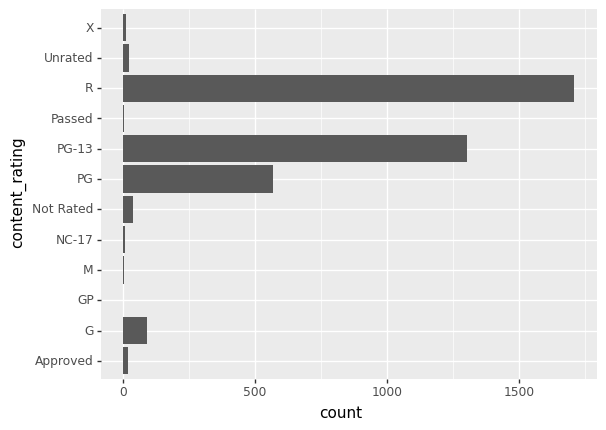

<ggplot: (8769632871542)>

In [ ]:
ggplot(new_movie) + aes(x="content_rating") + geom_bar() + coord_flip()

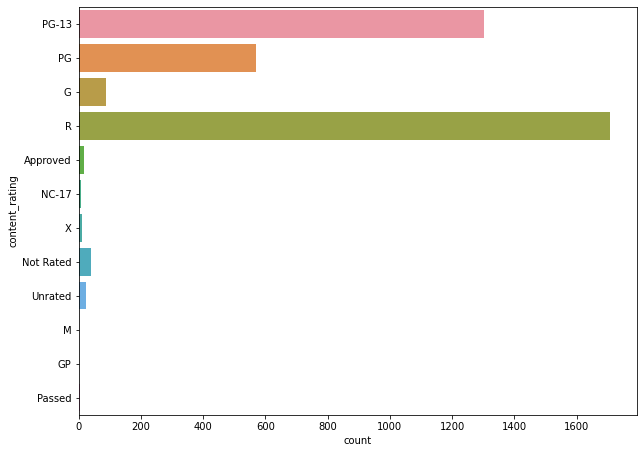

In [ ]:
plt.figure(figsize=(10,7.5))
sns.countplot(y=new_movie["content_rating"])
plt.show()

In [ ]:
##get top 3 values of content_rating

valrate = new_movie["content_rating"].value_counts()[:3].index
print(valrate)
new_movie['content_rating'] = new_movie.content_rating.where(new_movie.content_rating.isin(valrate), 'other')
new_movie['content_rating'].head(30)

#替代欄位內數據組成

Index(['R', 'PG-13', 'PG'], dtype='object')


<ipython-input-20-735e6be3f90d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0     PG-13
1     PG-13
2     PG-13
3     PG-13
5     PG-13
6     PG-13
7        PG
8     PG-13
9        PG
10    PG-13
11    PG-13
12    PG-13
13    PG-13
14    PG-13
15    PG-13
16       PG
17    PG-13
18    PG-13
19    PG-13
20    PG-13
21    PG-13
22    PG-13
23    PG-13
24    PG-13
25    PG-13
26    PG-13
27    PG-13
28    PG-13
29    PG-13
30    PG-13
Name: content_rating, dtype: object

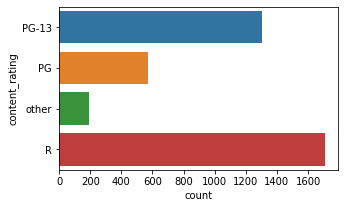

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y=new_movie["content_rating"])
plt.show()

In [ ]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

new_movie["aspect_ratio"].fillna(movie_df["aspect_ratio"].median(),inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Recheck that all the null values are removed
new_movie.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#Count of the language values 

new_movie["language"].value_counts()

English       3613
French          34
Spanish         23
Mandarin        14
German          10
Japanese        10
Cantonese        7
Italian          7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Indonesian       2
Hebrew           2
Aboriginal       2
Dari             2
Mongolian        1
None             1
Romanian         1
Vietnamese       1
Arabic           1
Zulu             1
Czech            1
Russian          1
Filipino         1
Maya             1
Kazakh           1
Hungarian        1
Aramaic          1
Bosnian          1
Name: language, dtype: int64

In [ ]:
a=new_movie["language"].value_counts()
a.index

Index(['English', 'French', 'Spanish', 'Mandarin', 'German', 'Japanese',
       'Cantonese', 'Italian', 'Portuguese', 'Hindi', 'Korean', 'Norwegian',
       'Danish', 'Thai', 'Persian', 'Dutch', 'Indonesian', 'Hebrew',
       'Aboriginal', 'Dari', 'Mongolian', 'None', 'Romanian', 'Vietnamese',
       'Arabic', 'Zulu', 'Czech', 'Russian', 'Filipino', 'Maya', 'Kazakh',
       'Hungarian', 'Aramaic', 'Bosnian'],
      dtype='object')

94 % of the movie is english

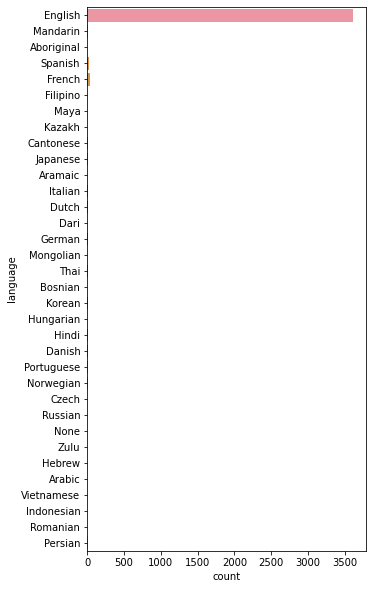

In [ ]:
plt.figure(figsize=(5,10))
sns.countplot(y=new_movie["language"])
plt.show()

In [ ]:
#Most of the values for the languages is english we can drop the english column

new_movie.drop('language',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Creating a new column to check the net profit made by the company (Gross-+Budget) 

new_movie["Revenue"]=(new_movie['budget']+new_movie['gross']) 

new_movie.head(5)

<ipython-input-29-84103833c653>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Revenue
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,997505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,609404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,445074175.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,698130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,336758679.0


In [ ]:
#Creating a new column to check the profit percentage made by the company 

new_movie['Profit_Percentage']=(new_movie["gross"]/new_movie["budget"])*100

<ipython-input-30-d843dc830b7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Value counts for the countries 

value_counts=new_movie["country"].value_counts()
print(value_counts)

USA               3000
UK                 315
France             102
Germany             79
Canada              60
Australia           40
Spain               21
Japan               15
China               13
Hong Kong           13
Italy               11
New Zealand         11
Denmark              9
South Korea          8
Ireland              7
Mexico               6
India                5
Brazil               5
Iran                 4
Norway               4
Thailand             4
South Africa         3
Netherlands          3
Czech Republic       3
Russia               3
Argentina            3
Israel               2
Hungary              2
Romania              2
Taiwan               2
Official site        1
Iceland              1
Afghanistan          1
Indonesia            1
New Line             1
Poland               1
Colombia             1
Peru                 1
Aruba                1
Finland              1
Chile                1
Belgium              1
Georgia              1
West German

We can see most of the movies are from USA ,UK and the rest of the countries

In [ ]:
##get top 2 values of countries
vals = value_counts[:2].index
print (vals)
new_movie['country'] = new_movie.country.where(new_movie.country.isin(vals), 'other')

#替代欄位內數據組成

Index(['USA', 'UK'], dtype='object')


<ipython-input-32-1da461a2229a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Successfully divided the country into three catogories 
new_movie["country"].value_counts()

USA      3000
other     456
UK        315
Name: country, dtype: int64

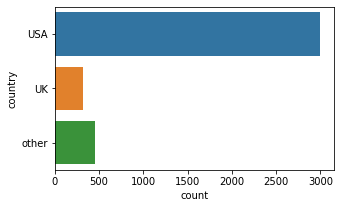

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y=new_movie["country"])
plt.show()

In [ ]:
new_movie[['Revenue',"budget","gross","Profit_Percentage"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,3771.0,9.757518e+07,2.425708e+08,13584.0000,2.429224e+07,5.843815e+07,1.160376e+08,1.221770e+10
budget,3771.0,4.571593e+07,2.255508e+08,218.0000,1.000000e+07,2.500000e+07,5.000000e+07,1.221550e+10
gross,3771.0,5.185925e+07,6.958063e+07,162.0000,7.690579e+06,2.899545e+07,6.646449e+07,7.605058e+08
Profit_Percentage,3771.0,6.352304e+02,1.316415e+04,0.0018,4.732750e+01,1.096217e+02,2.237757e+02,7.194486e+05


In [ ]:
filter1 = new_movie["Revenue"]>1.221770e+10
print(new_movie[filter1])

     director_name  num_critic_for_reviews  duration  director_facebook_likes  \
2988  Joon-ho Bong                   363.0     110.0                    584.0   

      actor_3_facebook_likes  actor_2_name  actor_1_facebook_likes      gross  \
2988                    74.0  Kang-ho Song                   629.0  2201412.0   

                          genres actor_1_name  ... country  content_rating  \
2988  Comedy|Drama|Horror|Sci-Fi    Doona Bae  ...   other               R   

            budget title_year  actor_2_facebook_likes imdb_score  \
2988  1.221550e+10     2006.0                   398.0        7.0   

      aspect_ratio movie_facebook_likes       Revenue  Profit_Percentage  
2988          1.85                 7000  1.221770e+10           0.018021  

[1 rows x 27 columns]


The Host (2006) - IMDb 花最多預算也賺最多錢

# 視覺化分析

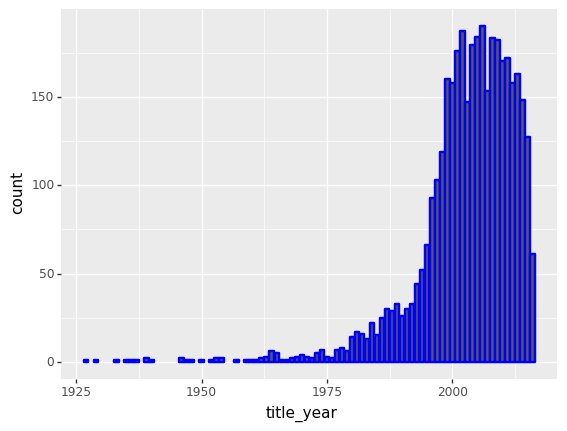

<ggplot: (8769630018928)>

In [ ]:
#Checking for the movies released year wise 
(ggplot(new_movie)         # defining what data to use
 + aes(x='title_year')    # defining what variable to use
 + geom_bar(size=1,color="blue") # defining the type of plot to use
)

We can see the most of the movies which are released after 1980

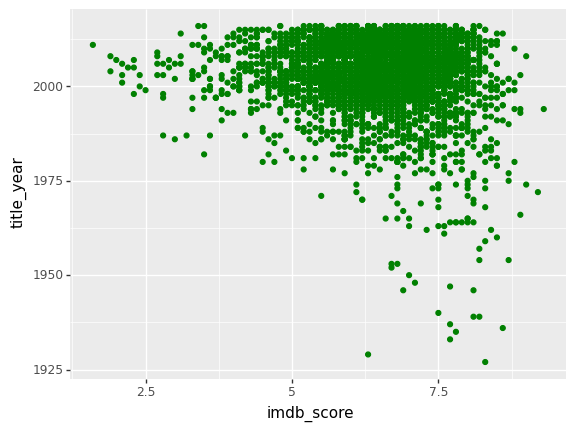

<ggplot: (8769629967632)>

In [ ]:
ggplot(aes(x=new_movie["imdb_score"], y=new_movie["title_year"])) +\
    geom_point(colour='green')

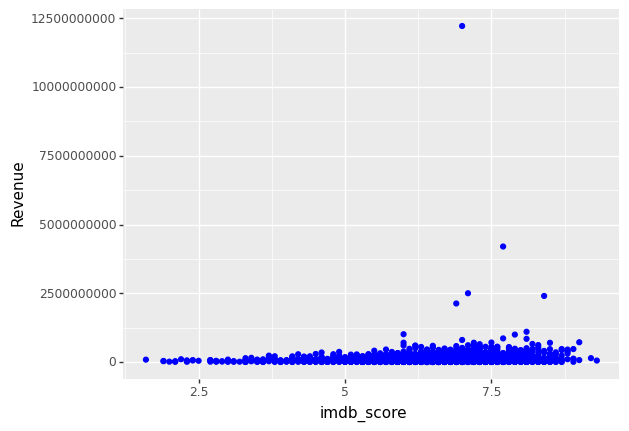

<ggplot: (8769629956190)>

In [ ]:
#Relationship between the imdb score and the Revenue made by the movie 
ggplot(aes(x='imdb_score', y='Revenue'), data=new_movie) +\
    geom_point(colour='blue')
 

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


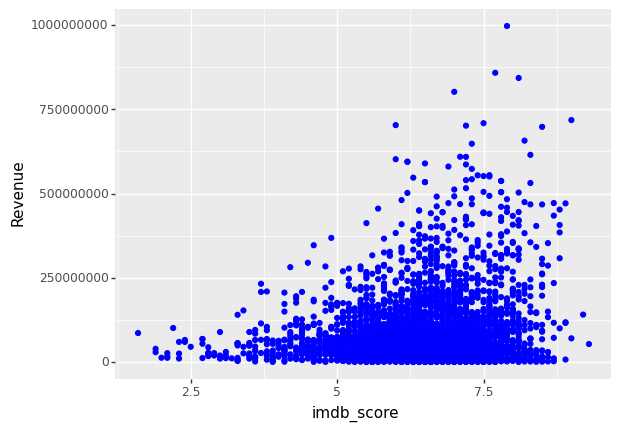

<ggplot: (8769628314962)>

In [ ]:
filterRevenue = new_movie["Revenue"]<1000000000
filterRevenue=new_movie["Revenue"][filterRevenue]

ggplot(aes(x=new_movie["imdb_score"], y=filterRevenue)) +\
    geom_point(colour='blue')

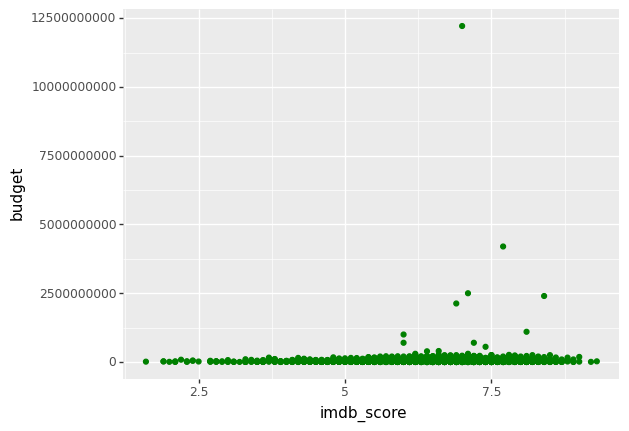

<ggplot: (8769628340267)>

In [ ]:
# Relationship between imdb score and profit budget

ggplot(aes(x='imdb_score', y='budget'), data=new_movie) +\
    geom_point(colour='green')

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


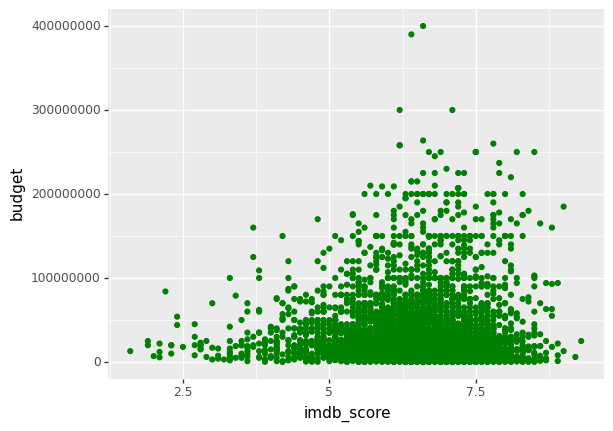

<ggplot: (8769628278664)>

In [ ]:
filterbudget = new_movie["budget"]<500000000
filterbudget=new_movie["budget"][filterbudget]

ggplot(aes(x=new_movie["imdb_score"], y=filterbudget)) +\
    geom_point(colour='green')

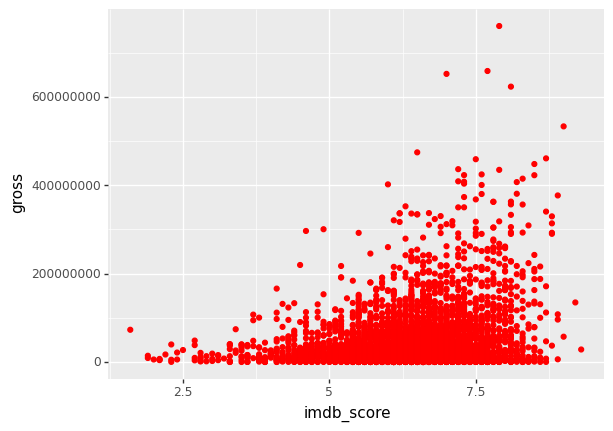

<ggplot: (8769628294723)>

In [ ]:
# Relationship between imdb score and gross

ggplot(aes(x='imdb_score', y='gross'), data=new_movie) +\
    geom_point(colour='red') 

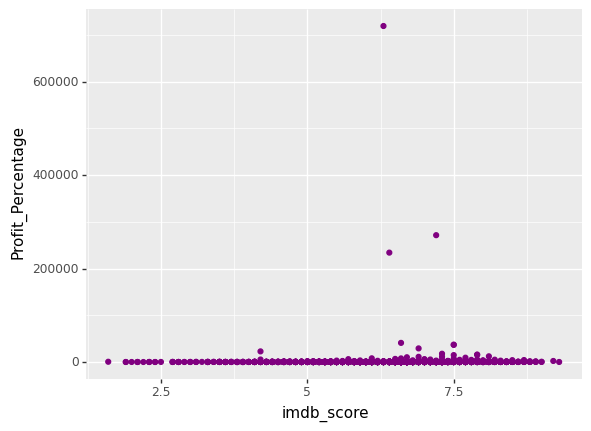

<ggplot: (8769628101196)>

In [ ]:
ggplot(aes(x='imdb_score', y='Profit_Percentage'), data=new_movie) +\
    geom_point(colour='purple') 

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


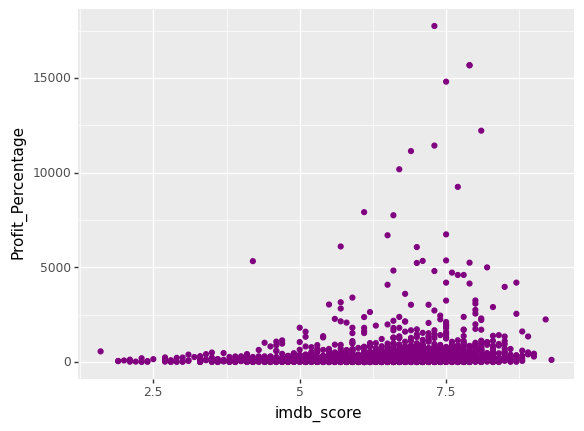

<ggplot: (8769628054661)>

In [ ]:
# Relationship between imdb score and Profit_Percentage

filterPercentage = new_movie["Profit_Percentage"]<20000
filterPercentage=new_movie["Profit_Percentage"][filterPercentage]

ggplot(aes(x=new_movie["imdb_score"], y=filterPercentage)) +\
    geom_point(colour='purple') 


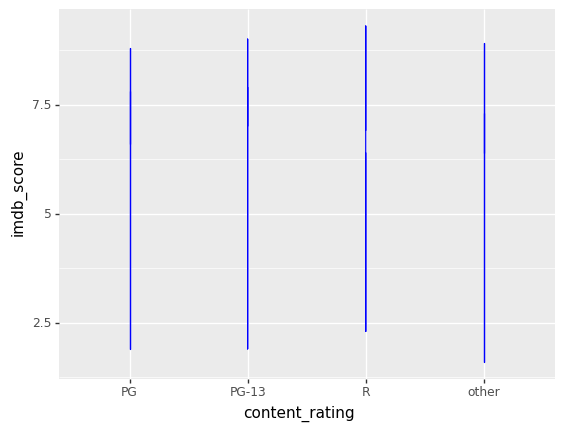

<ggplot: (8769628239502)>

In [ ]:
#Checking for the imdb rating of the movies and compared with the content_rating

ggplot(aes(x='content_rating', y='imdb_score'), data=new_movie) +\
    geom_line(colour='blue')


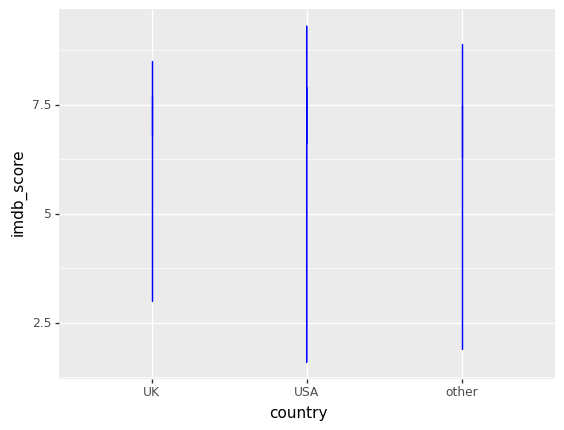

<ggplot: (8769627956408)>

In [ ]:
#Checking for the imdb rating of the movies and compared with the countries  

ggplot(aes(x='country', y='imdb_score'), data=new_movie) +\
    geom_line(colour='blue')

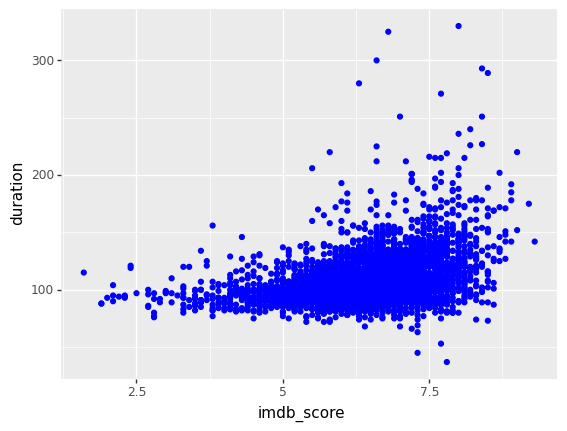

<ggplot: (8769627949300)>

In [ ]:
(ggplot(new_movie)
 + aes(x='imdb_score', y='duration')
 + geom_point(color="blue")
 # labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

In [ ]:
new_movie.columns


Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Revenue', 'Profit_Percentage'],
      dtype='object')

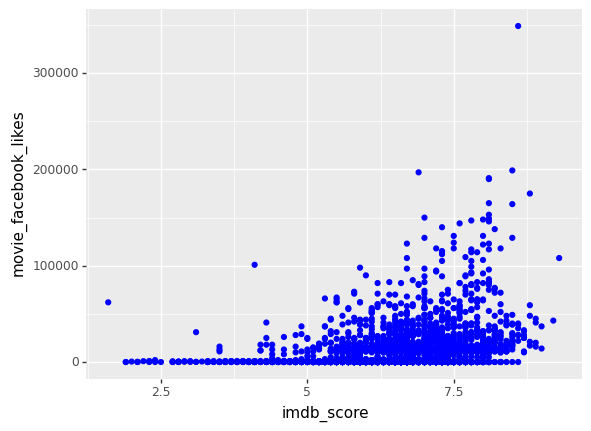

<ggplot: (8769628030895)>

In [ ]:
#Finding the corelation between imdb_rating with respect to facebook likes 

(ggplot(new_movie)
 + aes(x='imdb_score', y='movie_facebook_likes')
 + geom_point(color="blue")
 # labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

In [ ]:
new_movie.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Revenue', 'Profit_Percentage'],
      dtype='object')

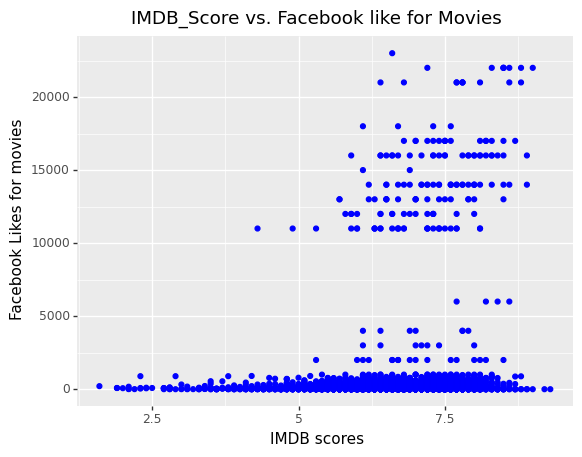

<ggplot: (8769627965133)>

In [ ]:
#Finding the corelation between imdb_rating with respect to facebook likes 

(ggplot(new_movie)
 + aes(x='imdb_score', y='director_facebook_likes')
 + geom_point(color="blue")
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

In [ ]:
new_movie.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Revenue', 'Profit_Percentage'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


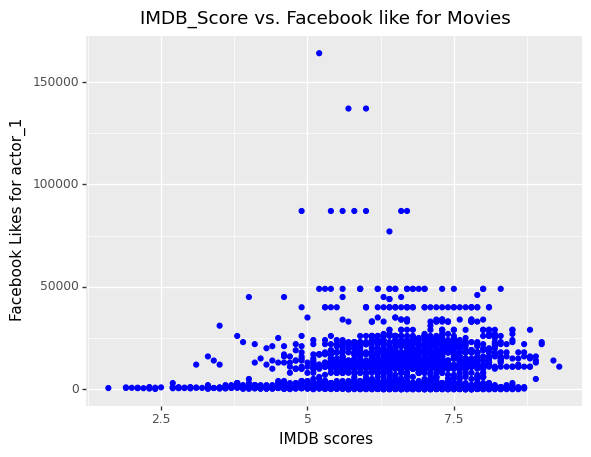

<ggplot: (8769630007619)>

In [ ]:
#Finding the corelation between imdb_rating with respect to facebook likes 
#扣離群值

filteractor_1 = new_movie["actor_1_facebook_likes"]<200000
filteractor_1=new_movie["actor_1_facebook_likes"][filteractor_1]

(ggplot(new_movie)
 + aes(x='imdb_score', y='filteractor_1')
 + geom_point(color="blue")
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for actor_1')
)

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


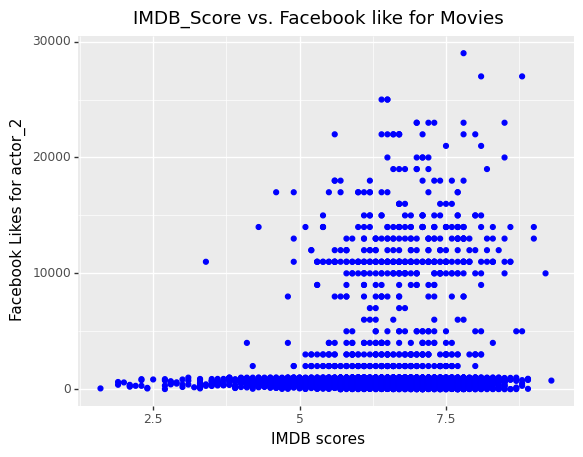

<ggplot: (8769630145928)>

In [ ]:
#Finding the corelation between imdb_rating with respect to facebook likes 
#扣離群值

filteractor_2 = new_movie["actor_2_facebook_likes"]<50000
filteractor_2=new_movie["actor_2_facebook_likes"][filteractor_2]

(ggplot(new_movie)
 + aes(x='imdb_score', y='filteractor_2')
 + geom_point(color="blue")
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for actor_2')
)

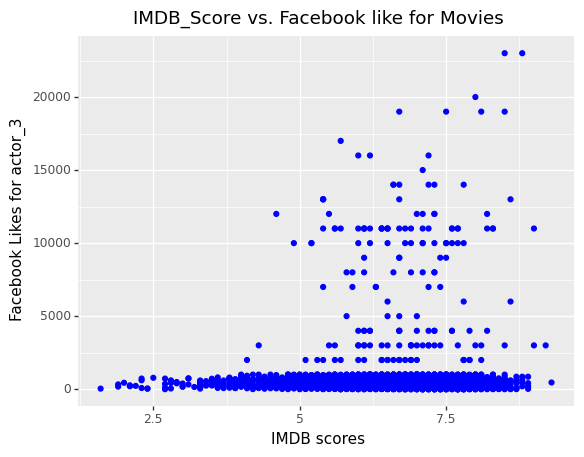

<ggplot: (8769630034499)>

In [ ]:
#Finding the corelation between imdb_rating with respect to facebook likes 

(ggplot(new_movie)
 + aes(x='imdb_score', y='actor_3_facebook_likes')
 + geom_point(color="blue")
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for actor_3')
)

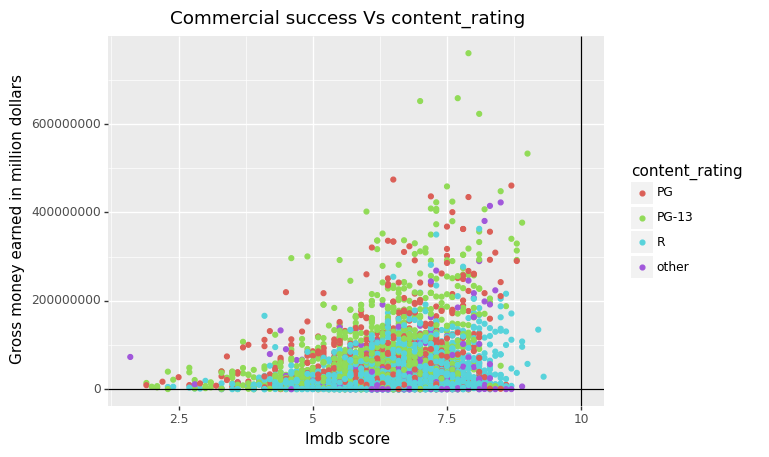

<ggplot: (8769632828040)>

In [ ]:
#Commercial success vs critial acclaim
#movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
#movie_df_new=movie_df.head(20)

(ggplot(new_movie)
 + aes(x='imdb_score', y='gross',color = "content_rating")
 + geom_point()
 +  geom_hline(aes(yintercept = 600)) + 
  geom_vline(aes(xintercept = 10)) + 
  xlab("Imdb score") + 
  ylab("Gross money earned in million dollars") + 
  ggtitle("Commercial success Vs content_rating"))
  #annotate("text", x = 9.3, y = 10000000, label = "High ratings \n & low gross"))

PG-13

# 清理不必要資料

In [ ]:
#Removing the director name column
new_movie.drop('director_name', axis=1, inplace=True)

#Removing the actor1 ,actor 2 and actor 3 names 
new_movie.drop('actor_1_name',axis=1,inplace=True)
new_movie.drop('actor_2_name',axis=1,inplace=True)
new_movie.drop('actor_3_name',axis=1,inplace=True)

#Dropping the movie title 
new_movie.drop('movie_title',axis=1,inplace=True)

#Dropping the movie title 
new_movie.drop('plot_keywords',axis=1,inplace=True)

#Dropping the movie title_year
new_movie.drop('title_year',axis=1,inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Value count of genres
new_movie['genres'].value_counts()

#Most of the values are equally distributed in genres column ,so we can remove the genres column
new_movie.drop('genres',axis=1,inplace =True)

In [ ]:
new_movie.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Revenue', 'Profit_Percentage'],
      dtype='object')

Remove the linear dependant variables**

In [ ]:
#刪除Revenue
# Dropiing the Revenue column from the dataset
new_movie.drop('Revenue',axis=1,inplace=True)

In [ ]:
#Dropping the profit percentage column from the dataset

new_movie.drop('Profit_Percentage',axis=1,inplace=True)

Remove the coreelated variables

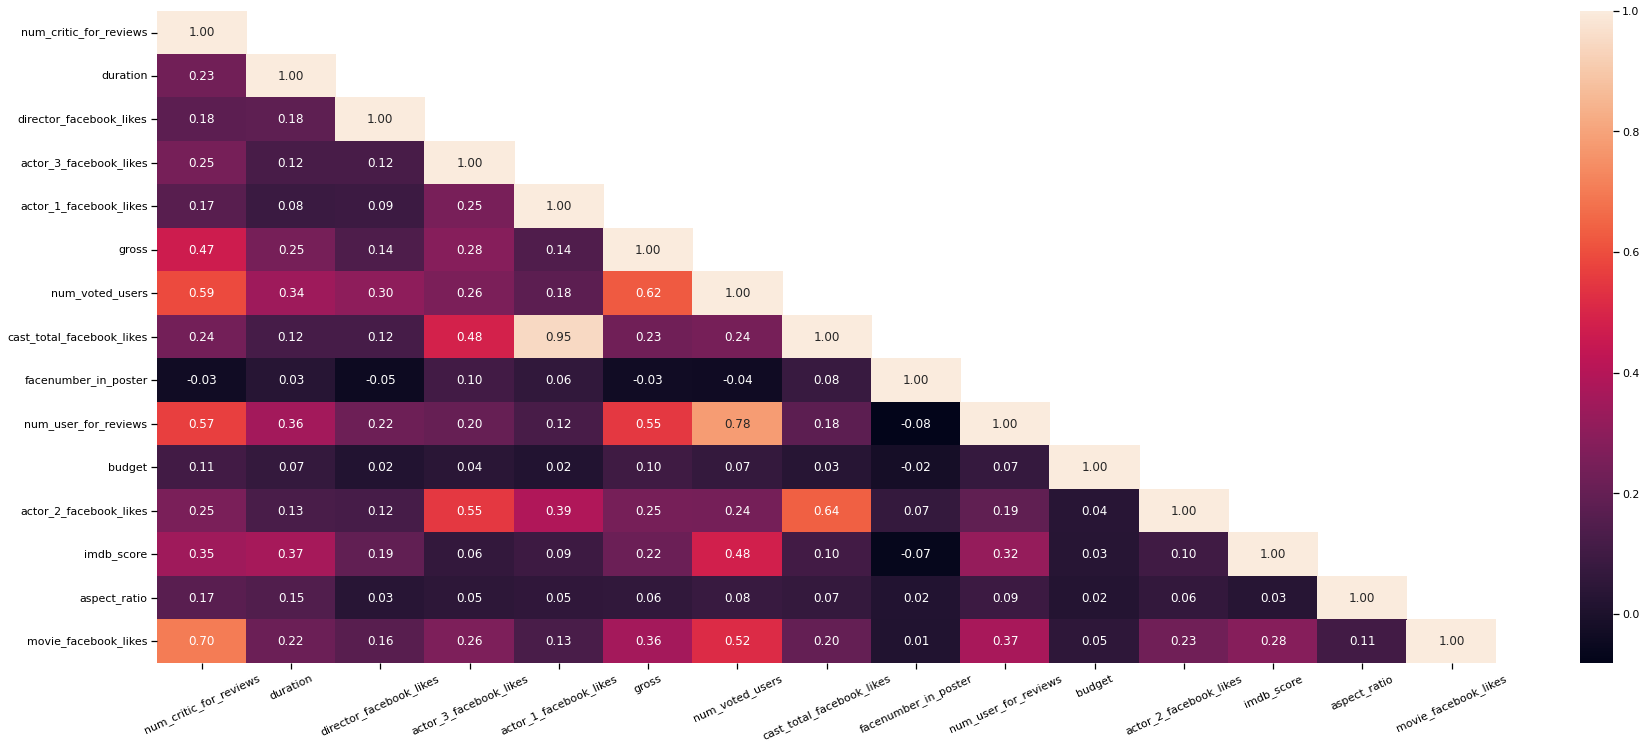

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns

#建立相關
corr = new_movie.corr()
#設定熱度圖
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(30,12))

#將熱度圖砍半
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
#設定入熱度圖資料
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') #annot>>數字
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=25)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)


In [ ]:
#Adding the facebook likes of actor 2 and actor 3 together 
new_movie['Other_actor_facebbok_likes']=new_movie["actor_2_facebook_likes"] + new_movie['actor_3_facebook_likes']

<ipython-input-64-612399a1b664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

new_movie.drop('actor_2_facebook_likes',axis=1,inplace=True)


In [ ]:
new_movie.drop('actor_3_facebook_likes',axis=1,inplace=True)

In [ ]:
new_movie.drop('cast_total_facebook_likes',axis=1,inplace=True)


In [ ]:
print(new_movie['num_critic_for_reviews'].head(10))
print(new_movie['num_user_for_reviews'].head(10))

0     723.0
1     302.0
2     602.0
3     813.0
5     462.0
6     392.0
7     324.0
8     635.0
9     375.0
10    673.0
Name: num_critic_for_reviews, dtype: float64
0     3054.0
1     1238.0
2      994.0
3     2701.0
5      738.0
6     1902.0
7      387.0
8     1117.0
9      973.0
10    3018.0
Name: num_user_for_reviews, dtype: float64


In [ ]:
#Adding the num_user_for_reviews and num_critic_for_reviews.
new_movie['Total_reviews']=new_movie["num_critic_for_reviews"] + new_movie['num_user_for_reviews']


<ipython-input-69-a2c3f93d5240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
new_movie['Total_reviews']

0       3777.0
1       1540.0
2       1596.0
3       3514.0
5       1200.0
         ...  
5033     514.0
5034      70.0
5035     186.0
5037      28.0
5042     127.0
Name: Total_reviews, Length: 3771, dtype: float64

In [ ]:
#Adding the num_voted_users and Total_reviews ratio.
#new_movie['voted_reviews_ratio']=new_movie["num_voted_users"] / new_movie['Total_reviews']
new_movie['reviews_voted_ratio']=new_movie['Total_reviews']/new_movie["num_voted_users"] 

<ipython-input-71-4dc0beb57119>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Dropping the num_critic_for_review

new_movie.drop('num_critic_for_reviews',axis=1,inplace=True)
new_movie.drop('num_user_for_reviews',axis=1,inplace=True)
new_movie.drop('num_voted_users',axis=1,inplace=True)
new_movie.drop('reviews_voted_ratio',axis=1,inplace=True)

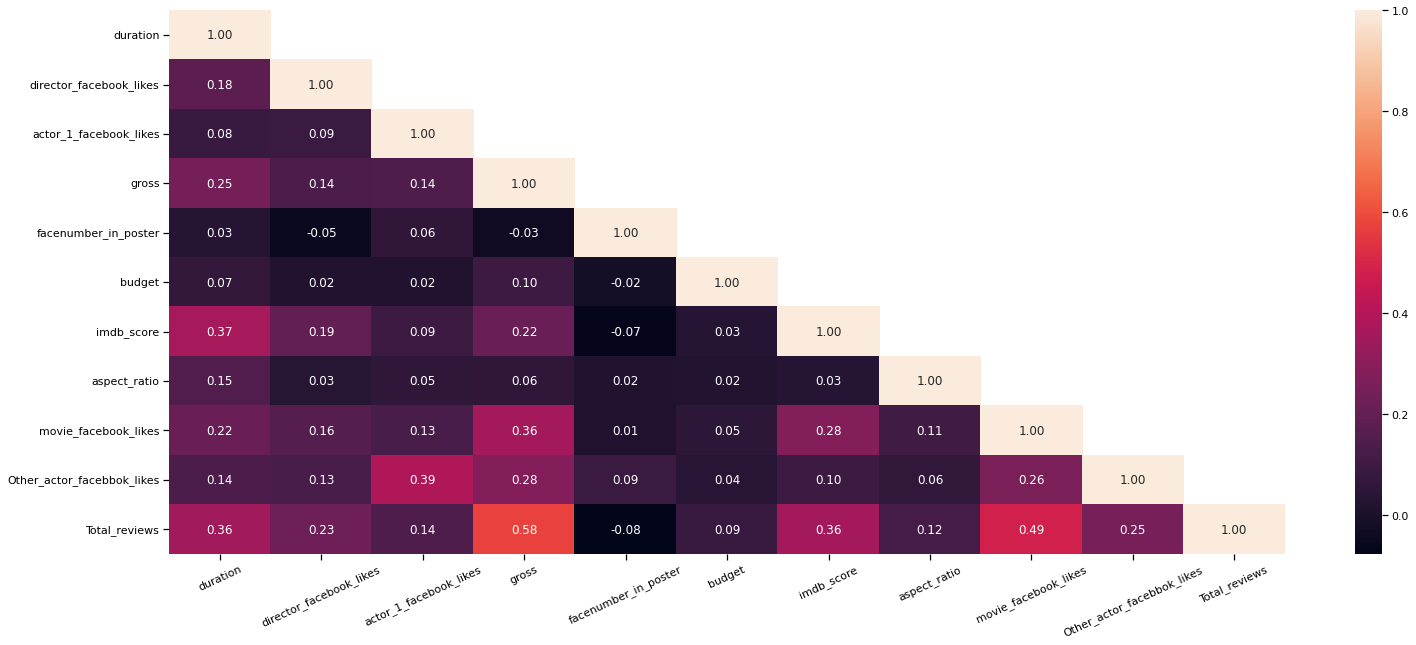

In [ ]:
# New Correlation matrix shown in the figure 

import matplotlib.pyplot as plt
import seaborn as sns
#建立相關
corr = new_movie.corr()
#建立熱度圖畫布
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(25,10))
#將熱度圖砍半
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
#設定熱度圖內部
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=25)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [ ]:
# We need to categorize the imdb values in the range of 0-6, 6-8, 8-10 to mark them as the bad,average,good and excellent movies respectively

new_movie["imdb_binned_score"]=pd.cut(new_movie['imdb_score'], bins=[0,6,8,10], right=True, labels=False)+1 
#bins讓區間變成1 2 3 
#right區間包後
#labels區間長度(當bins是間隔索引時，將忽略此參數)

KeyError: ignored

In [ ]:
#扣離群值

#filteractor_reviews = new_movie["reviews_voted_ratio"]<0.1
#filteractor_reviews= new_movie["reviews_voted_ratio"][filteractor_reviews]


#(ggplot(new_movie)
# + aes(x='imdb_score', y='filteractor_reviews')
# + geom_point(color="red")
 # labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
#)

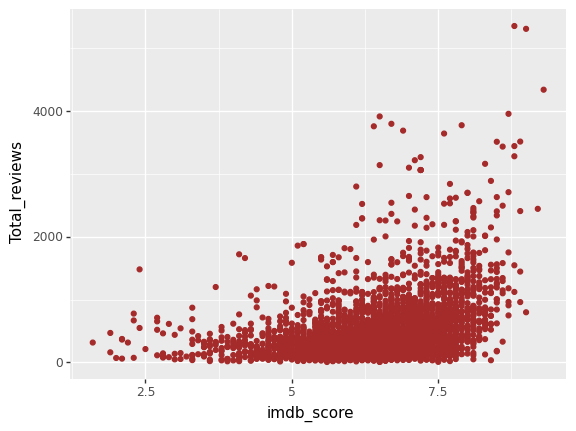

<ggplot: (8769627631101)>

In [ ]:
(ggplot(new_movie)
 + aes(x='imdb_score', y='Total_reviews')
 + geom_point(color="brown")
 # labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

In [ ]:
np.unique(new_movie["imdb_binned_score"])

array([1, 2, 3])

In [ ]:
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 
new_movie.drop('imdb_score',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
new_movie.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,country,content_rating,budget,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,Total_reviews,imdb_binned_score
0,178.0,0.0,1000.0,760505847.0,0.0,USA,PG-13,237000000.0,1.78,33000,1791.0,3777.0,2
1,169.0,563.0,40000.0,309404152.0,0.0,USA,PG-13,300000000.0,2.35,0,6000.0,1540.0,2
2,148.0,0.0,11000.0,200074175.0,1.0,UK,PG-13,245000000.0,2.35,85000,554.0,1596.0,2
3,164.0,22000.0,27000.0,448130642.0,0.0,USA,PG-13,250000000.0,2.35,164000,46000.0,3514.0,3
5,132.0,475.0,640.0,73058679.0,1.0,USA,PG-13,263700000.0,2.35,24000,1162.0,1200.0,2


In [ ]:
new_movie = pd.get_dummies(data = new_movie, columns = ['country'] , prefix = ['country'] , drop_first = True)
# drop_first =True) 刪除第一種類別

#data: array,series,dataframe
#prefix: 輸出物件前面加一點文字 prefix=A  例如輸出[專業]>[A專業]

In [ ]:
print(new_movie["country_USA"])

0       1
1       1
2       0
3       1
5       1
       ..
5033    1
5034    0
5035    1
5037    1
5042    1
Name: country_USA, Length: 3771, dtype: uint8


In [ ]:
new_movie.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'facenumber_in_poster', 'content_rating', 'budget',
       'aspect_ratio', 'movie_facebook_likes', 'Other_actor_facebbok_likes',
       'Total_reviews', 'imdb_binned_score', 'country_USA', 'country_other'],
      dtype='object')

In [ ]:
np.unique(new_movie['content_rating'])

array(['PG', 'PG-13', 'R', 'other'], dtype=object)

In [ ]:
new_movie = pd.get_dummies(data = new_movie, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [ ]:
new_movie.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'facenumber_in_poster', 'budget', 'aspect_ratio',
       'movie_facebook_likes', 'Other_actor_facebbok_likes', 'Total_reviews',
       'imdb_binned_score', 'country_USA', 'country_other',
       'content_rating_PG-13', 'content_rating_R', 'content_rating_other'],
      dtype='object')

In [ ]:
new_movie.shape

(3771, 16)

In [ ]:
new_movie["imdb_binned_score"].value_counts()

2    2465
1    1148
3     158
Name: imdb_binned_score, dtype: int64

# 分割資料集、標準化

In [ ]:
# set X
X=new_movie
X = X.drop(["imdb_binned_score"],axis=1)
X.columns
# set X
y=new_movie["imdb_binned_score"]

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=1)

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_Scaler = Scaler.fit_transform(X_train)
X_test_Scaler = Scaler.transform(X_test)

In [ ]:
X_Scaler = Scaler.transform(X)

# 機器學習

knn

In [ ]:
#KNN regular 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
for j in range(10,15):
  knn = KNeighborsClassifier(n_neighbors=j)
  knn.fit(X_train, np.ravel(y_train,order='C'))
  knnpred = knn.predict(X_test)
  cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
  print(cnf_matrix)
  print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[128 248   0]
 [152 667   1]
 [  7  42   0]]
Accuracy: 0.6385542168674698
[[102 274   0]
 [109 710   1]
 [  5  44   0]]
Accuracy: 0.6522088353413654
[[121 255   0]
 [143 676   1]
 [  7  42   0]]
Accuracy: 0.6401606425702812
[[104 272   0]
 [109 710   1]
 [  6  43   0]]
Accuracy: 0.6538152610441768
[[112 264   0]
 [134 686   0]
 [  8  41   0]]
Accuracy: 0.6409638554216868


In [ ]:
#KNN Scaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_Scaler, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[199 177   0]
 [142 676   2]
 [  3  38   8]]
Accuracy: 0.7092369477911646


SVC

In [ ]:
#SVC regular
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[ 79 297   0]
 [283 537   0]
 [ 26  23   0]]
Accuracy: 0.4947791164658635


In [ ]:
#SVC Scaler
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train_Scaler, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[177 198   1]
 [151 655  14]
 [  9  35   5]]
Accuracy: 0.672289156626506


Naive Bayes

In [ ]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

[[323  51   2]
 [548 215  57]
 [ 10  27  12]]
Accuracy: 0.44176706827309237


In [ ]:
#Naive bayes Scaler

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train_Scaler, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

[[320  50   6]
 [450 297  73]
 [  4  27  18]]
Accuracy: 0.5100401606425703


Decision Tree

In [ ]:
#Decision Tree
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=3) #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[132 244   0]
 [ 65 755   0]
 [  0  49   0]]
Accuracy: 0.7124497991967872


In [ ]:
from pydotplus import graph_from_dot_data 
from sklearn.tree import export_graphviz

dtree_data = export_graphviz(dtree, 
  out_file=None,filled=True, rounded=True,
  class_names=['0-6', '6-8', '8-10'],
  feature_names=X.columns,
  )
graph = graph_from_dot_data(dtree_data) 
graph.write_png('tree1.png')


True

In [ ]:
#Decision Tree  Scaler

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train_Scaler, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[198 177   1]
 [183 619  18]
 [  7  25  17]]
Accuracy: 0.6698795180722892


Ada Boosting

In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))

[[200 176   0]
 [190 613  17]
 [  5  27  17]]
Accuracy: 0.6666666666666666


In [ ]:
#Ada Boosting Scaler
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train_Scaler,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))

[[197 179   0]
 [184 615  21]
 [  5  28  16]]
Accuracy: 0.6650602409638554


Random Forest

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[195 181   0]
 [ 65 751   4]
 [  0  39  10]]
Accuracy: 0.7678714859437751


In [ ]:
#Random Forest Scaler

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train_Scaler, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[197 179   0]
 [ 60 755   5]
 [  0  40   9]]
Accuracy: 0.7718875502008032


Bagging Classifier

In [ ]:
#Bagging classfier

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl.fit(X_train, y_train)
# 預測
test_y_predicted = bgcl.predict(X_test)

# 績效
accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(accuracy)

0.7622489959839357


In [ ]:
#Bagging classfier Scaler

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl.fit(X_train_Scaler, y_train)
# 預測
test_y_predicted = bgcl.predict(X_test_Scaler)

# 績效
accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(accuracy)

0.7566265060240964


Gradient Boosting

In [ ]:
#Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[213 163   0]
 [ 87 722  11]
 [  0  33  16]]
Accuracy: 0.763855421686747


In [ ]:
#Gradient boosting Scaler

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train_Scaler ,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[213 163   0]
 [ 87 723  10]
 [  0  34  15]]
Accuracy: 0.763855421686747


XGBooosting

In [ ]:
#XGBooosting
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

[[194 182   0]
 [ 74 737   9]
 [  0  36  13]]
Accuracy: 0.7582329317269076


In [ ]:
#XGBooosting Scaler
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_Scaler, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test_Scaler)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

[[193 183   0]
 [ 74 737   9]
 [  0  36  13]]
Accuracy: 0.757429718875502


In [ ]:
# 利用交叉驗證選擇最佳演算法

In [ ]:
#METHOD 1
algorithms = [knn,svc,gaussiannb,dtree,abcl,rfc,bgcl,gbcl,xgb]
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    # 進行交叉驗證
    scores = cross_val_score(algorithm , X_train_Scaler, y_train,
        cv=stratifiedkfold, scoring='accuracy')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均分數 :  {score:.4f}  個別分數 : {scores}  {name}')

平均分數 :  0.6726  個別分數 : [0.66627078 0.66745843 0.68408551]  KNeighborsClassifier
平均分數 :  0.6378  個別分數 : [0.64608076 0.62945368 0.63776722]  SVC
平均分數 :  0.4743  個別分數 : [0.44536817 0.48693587 0.49049881]  GaussianNB
平均分數 :  0.6326  個別分數 : [0.63657957 0.63539192 0.62589074]  DecisionTreeClassifier
平均分數 :  0.6342  個別分數 : [0.64489311 0.63064133 0.62707838]  AdaBoostClassifier
平均分數 :  0.7336  個別分數 : [0.73634204 0.72209026 0.74228029]  RandomForestClassifier
平均分數 :  0.7300  個別分數 : [0.73752969 0.71258907 0.73990499]  BaggingClassifier
平均分數 :  0.7245  個別分數 : [0.72327791 0.70427553 0.74584323]  GradientBoostingClassifier
平均分數 :  0.7268  個別分數 : [0.72327791 0.71852732 0.73871734]  XGBClassifier


In [ ]:
#METHOD 2
algorithms = [knn,svc,gaussiannb,dtree,abcl,rfc,bgcl,gbcl,xgb]

from sklearn.model_selection import StratifiedKFold
StratifiedKFold = StratifiedKFold(n_splits =10)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
  scores = cross_val_score(algorithm,X_train,y_train,
       cv = StratifiedKFold,scoring = "accuracy")  #roc_auc
  score = scores.mean()
  name = algorithm.__class__.__name__
  print(name)
  print("平均分數%.4f" %score)
  #print("個別分數",scores) 
  print("-----------------------") 


KNeighborsClassifier
平均分數0.6148
-----------------------
SVC
平均分數0.4850
-----------------------
GaussianNB
平均分數0.4343
-----------------------
DecisionTreeClassifier
平均分數0.6500
-----------------------
AdaBoostClassifier
平均分數0.6477
-----------------------
RandomForestClassifier
平均分數0.7423
-----------------------
BaggingClassifier
平均分數0.7427
-----------------------
GradientBoostingClassifier
平均分數0.7304
-----------------------
XGBClassifier
平均分數0.7347
-----------------------


In [ ]:
#模型表現最佳
#Bagging classfier

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl.fit(X_train, y_train)
# 預測
test_y_predicted = bgcl.predict(X_test)

# 績效
accuracy = metrics.accuracy_score(y_test, test_y_predicted)
print(accuracy)

0.7662650602409639


In [ ]:
from sklearn.metrics import classification_report
target_names = ['糞片','普片','神片']
print('Bagging Clasifier\n',classification_report(y_test, test_y_predicted,labels=[1,2,3],target_names=target_names))

Bagging Clasifie
               precision    recall  f1-score   support

          糞片       0.71      0.55      0.62       376
          普片       0.78      0.89      0.83       820
          神片       0.71      0.31      0.43        49

    accuracy                           0.77      1245
   macro avg       0.74      0.58      0.63      1245
weighted avg       0.76      0.77      0.75      1245



In [ ]:
#classification_report 解讀
#1、2、3代表 電影0-6, 6-8 8-10分電影區間
#macro avg 對應欄位直接平均
#weighted avg 按照support比例加權平均
#support 單位個數
#lables= 設定y test的標籤


##是否可以透過改變域值 以0.05為間距改變域職

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36664 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38917 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30446 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37325 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35201 missing from current font.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/bac

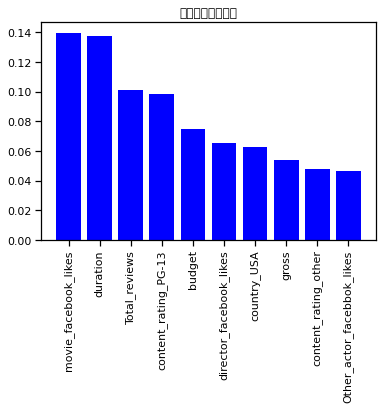

In [ ]:
#重要性分析

# 取得重要性向量
importances = xgb.feature_importances_

# 以項目名稱為鍵，生成 Series
w = pd.Series(importances, index=X.columns)

# 按值的大小排序
u = w.sort_values(ascending=False)

# 只提取前 10 個
v = u[:10]

# 繪製重要性的直方圖
plt.title('輸入項目的重要性')
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)), v.index, rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, test_y_predicted, average='micro')

(0.7662650602409639, 0.7662650602409639, 0.7662650602409639, None)

In [ ]:
from sklearn.metrics import classification_report

print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Bagging Clasifie\n',classification_report(y_test, test_y_predicted))
print('Gradient Boosting',classification_report(y_test, test_pred))
print('XGBoosting\n',classification_report(y_test, xgbprd))

#信賴區間

In [ ]:
#knn

from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(knn, X_Scaler, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
crossknn = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossknn.mean()              # crossknn 的平均
se = crossknn.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')


[0.66402116 0.67639257 0.75066313 0.69230769 0.71883289 0.68700265
 0.67374005 0.68169761 0.66578249 0.5596817 ]
0.6770121959777133
Sampling Mean: 0.677
Sampling StdErr: 0.049
95% Confidence Interval: (0.5809905062522783, 0.7730338857031483)


In [ ]:
0.7702163818683511- 0.679

0.09121638186835102

In [ ]:
#Decision Tree

from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(dtree, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
crossdtree = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossdtree.mean()              # crossdtree 的平均
se = crossdtree.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')

[0.61375661 0.59151194 0.63395225 0.64456233 0.69230769 0.65782493
 0.61538462 0.61538462 0.5198939  0.56763926]
0.6152218152218152
Sampling Mean: 0.615
Sampling StdErr: 0.048
95% Confidence Interval: (0.5208065457096384, 0.709637084733992)


In [ ]:
0.62-0.5157150696911205

0.10428493030887953

In [ ]:
#Random Forest

from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
crossrfc = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossrfc.mean()              # crossdtree 的平均
se = crossrfc.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')


[0.72751323 0.72679045 0.73474801 0.75596817 0.81432361 0.76127321
 0.73209549 0.71883289 0.69761273 0.67904509]
0.734820288268564
Sampling Mean: 0.735
Sampling StdErr: 0.037
95% Confidence Interval: (0.6622341412215305, 0.8074064353155976)


In [ ]:
0.73-0.6636574915537462

0.06634250844625378

In [ ]:
#XGBooosting Scaler


from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
crossxgb = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossxgb.mean()              # crossdtree 的平均
se = crossxgb.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')


[0.68783069 0.72148541 0.75596817 0.74005305 0.78249337 0.74005305
 0.72679045 0.70822281 0.64986737 0.67108753]
0.7183851907989839
Sampling Mean: 0.718
Sampling StdErr: 0.040
95% Confidence Interval: (0.6396872141885888, 0.797083167409379)


In [ ]:
 0.72-0.6384662515885824

0.08153374841141758

In [ ]:
#Gradient boosting Scaler


from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(gbcl, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())
crossgbcl = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossgbcl.mean()              # crossdtree 的平均
se = crossgbcl.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')

[0.71788079 0.73740053 0.74137931 0.69496021 0.64323607]
0.7069713844045883
Sampling Mean: 0.707
Sampling StdErr: 0.040
95% Confidence Interval: (0.6283568432691723, 0.7855859255400043)


In [ ]:
0.71-0.6183810731568972

0.0916189268431028

In [ ]:
#Bagging classfier Scaler

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats

scores = cross_val_score(bgcl, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())
crossbgcl = pd.Series(scores)

# 取得 X_mean 的 mean, std, 95% 信賴區間
m = crossbgcl.mean()              # crossdtree 的平均
se = crossbgcl.std()              # 標準誤
ci = stats.norm.interval(0.95, m, se)   # return [m - 1.96 std, m + 1.96 std]

print (f'Sampling Mean: {m:.3f}')
print (f'Sampling StdErr: {se:.3f}')
print (f'95% Confidence Interval: {ci}')

[0.7192053  0.71883289 0.76127321 0.71087533 0.67506631]
0.7170506086742671
Sampling Mean: 0.717
Sampling StdErr: 0.031
95% Confidence Interval: (0.6569251172832208, 0.7771761000653133)


In [ ]:
0.72-0.657029774776597

0.06297022522340301